In [3]:
import os,sys,json
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# num of grant by types
years = range(2009, 2020, 1)
grant_data = load_grant_data(years)
grant_types = set()
for v in grant_data.values():
    grant_types.update(v["count"].keys())

In [5]:
grant_types

{u'BOA/Task Order',
 u'Continuing grant',
 u'Contract',
 u'Contract Interagency Agreement',
 u'Cooperative Agreement',
 u'Fellowship',
 u'Fixed Price Award',
 u'Interagency Agreement',
 u'Intergovernmental Personnel Award',
 u'Standard Grant'}

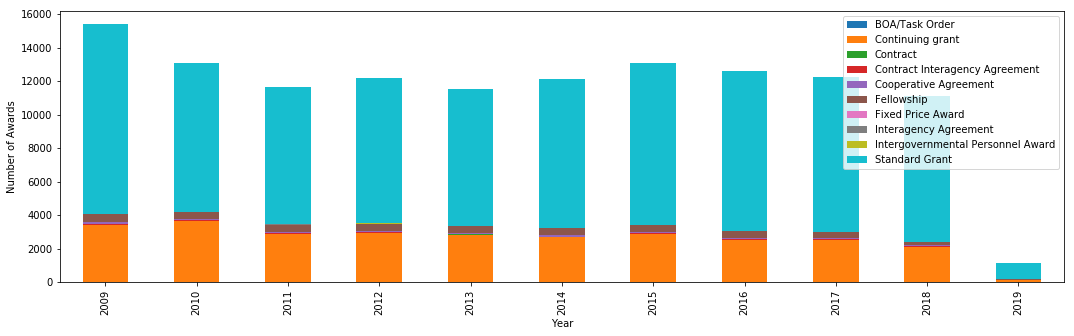

In [6]:
index = pd.Index(years, name='Year')
data = {g:[] for g in grant_types}
for y in years:
    for g in grant_types:
        data[g].append(grant_data[str(y)]["count"][g] if g in grant_data[str(y)]["count"] else 0)
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18, 5))
ax.set_ylabel('Number of Awards')
plt.show()

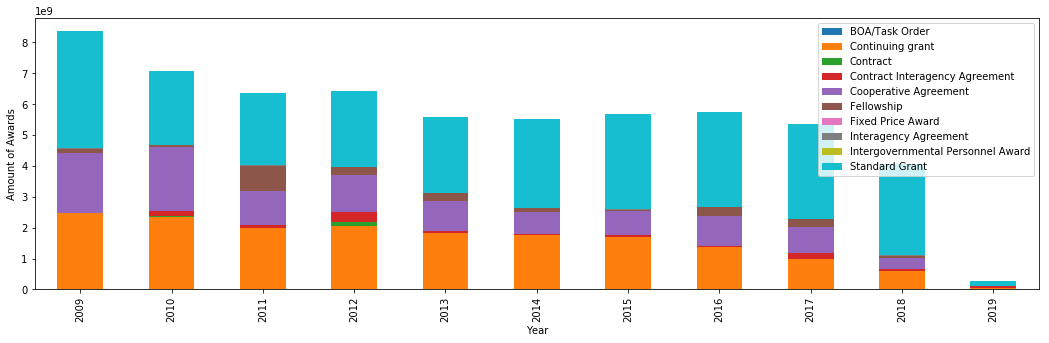

In [7]:
index = pd.Index(years, name='Year')
data = {g:[] for g in grant_types}
for y in years:
    for g in grant_types:
        data[g].append(grant_data[str(y)]["amount"][g] if g in grant_data[str(y)]["amount"] else 0)
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18, 5))
ax.set_ylabel('Amount of Awards')
plt.show()

In [24]:
def numpub_amount_plot(year_of_interest, types_of_grant, xlim=None, ylim=None):
    numpub_data = load_numpub_data(year_of_interest)
    filtered_data = [v for v in numpub_data.values() if v["amount"] > 0 and v["type"] in types_of_grant]
    N = len(filtered_data)
    # x = [v["amount"] for v in filtered_data]
    x = np.log([v["amount"] for v in filtered_data])
    y = [v["num_pubs"] for v in filtered_data]
    # y = np.log([v["num_pubs"] for v in filtered_data])
    colors = [list(grant_types).index(v["type"]) for v in filtered_data]
    area = [v["duration"]/10 for v in filtered_data]

    plt.figure(figsize=(18,4))
    plt.title(" & ".join(types_of_grant) + " " + str(year_of_interest))
    plt.ylabel("Number of publications")
    plt.xlabel("Log of grant amount")
    plt.scatter(x, y, s=area, c=colors, alpha=0.5, edgecolors="face")
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.show()

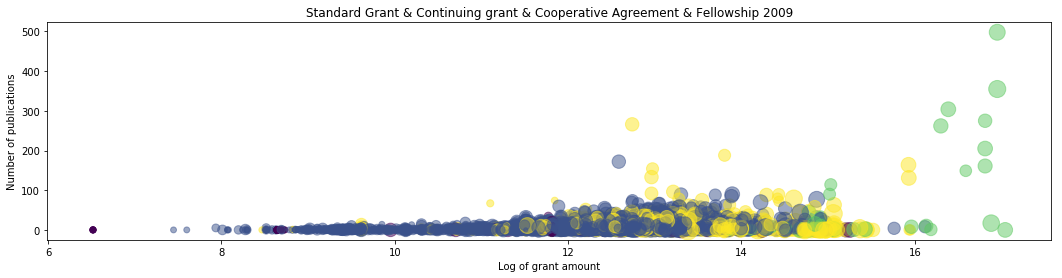

In [25]:
numpub_amount_plot(2009, ["Standard Grant", "Continuing grant", "Cooperative Agreement", "Fellowship"])

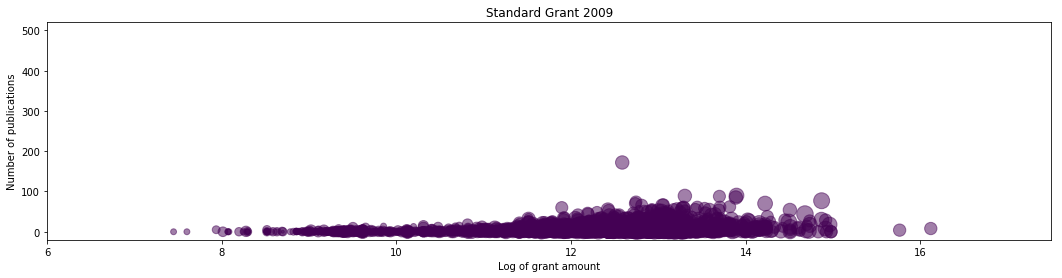

In [26]:
numpub_amount_plot(2009, ["Standard Grant"], xlim=[6,17.5], ylim=[-20,520])

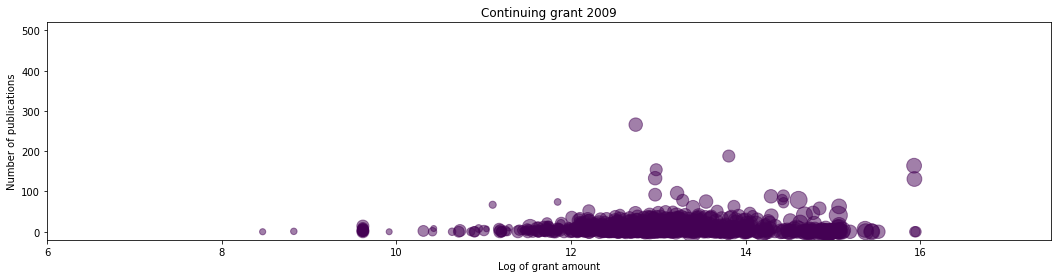

In [27]:
numpub_amount_plot(2009, ["Continuing grant"], xlim=[6,17.5], ylim=[-20,520])

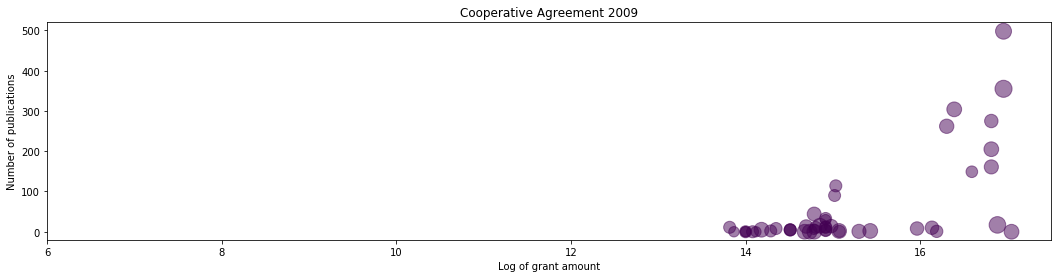

In [28]:
numpub_amount_plot(2009, ["Cooperative Agreement"], xlim=[6,17.5], ylim=[-20,520])

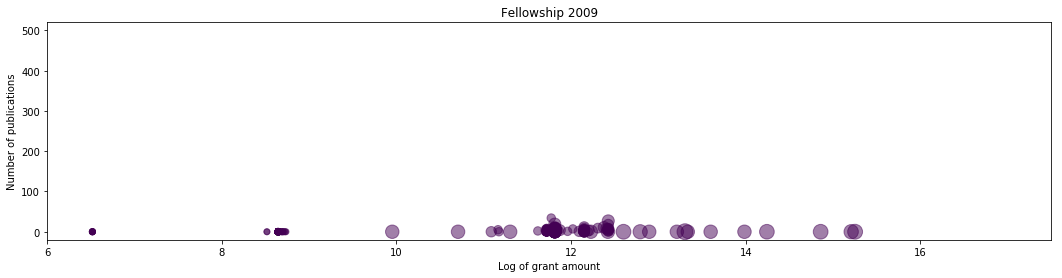

In [29]:
numpub_amount_plot(2009, ["Fellowship"], xlim=[6,17.5], ylim=[-20,520])